# Oxford Pet Dataset

https://www.robots.ox.ac.uk/~vgg/data/pets/

* Class ids  : 1-37
* SPECIES id : Cat 1, Dog 2
* BREED id   : Cat 1-25, Dog 1-12

In [1]:
import os
import numpy as np
from PIL import Image

In [2]:
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'oxford_pet')
image_dir = os.path.join(data_dir, 'images')
bbox_dir = os.path.join(data_dir, 'annotations', 'xmls')
seg_dir = os.path.join(data_dir, 'annotations', 'trimaps')

In [3]:
# image
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))

7390


In [4]:
# bounding box (head)
bbox_files = [fname for fname in os.listdir(bbox_dir) if os.path.splitext(fname)[-1] == '.xml']
print(len(bbox_files))

3686


In [5]:
# segmentation
seg_files = [fname for fname in os.listdir(seg_dir) if os.path.splitext(fname)[-1] == '.png']
print(len(seg_files))

7390


channel이 3이 아닌 image는 삭제, xml과 png도 같이 삭제

In [6]:
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)

    bbox_file = os.path.splitext(image_file)[0]+'.xml'
    bbox_path = os.path.join(bbox_dir, bbox_file)

    seg_file = os.path.splitext(image_file)[0]+'.png'
    seg_path = os.path.join(seg_dir, seg_file)

    image = Image.open(image_path)
    image_mode = image.mode
    
    if image_mode != 'RGB':
        image = np.asarray(image)
        print(image_file, ':', image_mode, image.shape)
        os.remove(image_path)
        os.remove(seg_path)
        try:
            os.remove(bbox_path)
        except FileNotFoundError:  # xml 없는 이미지도 있음.
            pass

Abyssinian_34.jpg : P (202, 250)
Abyssinian_5.jpg : RGBA (150, 200, 4)
Egyptian_Mau_129.jpg : L (325, 299)
Egyptian_Mau_139.jpg : P (250, 350)
Egyptian_Mau_14.jpg : RGBA (800, 582, 4)
Egyptian_Mau_145.jpg : P (188, 216)
Egyptian_Mau_167.jpg : P (275, 183)
Egyptian_Mau_177.jpg : P (175, 246)
Egyptian_Mau_186.jpg : RGBA (275, 183, 4)
Egyptian_Mau_191.jpg : P (214, 300)
staffordshire_bull_terrier_2.jpg : L (282, 500)
staffordshire_bull_terrier_22.jpg : L (500, 364)


In [7]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))
bbox_files = [fname for fname in os.listdir(bbox_dir) if os.path.splitext(fname)[-1] == '.xml']
print(len(bbox_files))
seg_files = [fname for fname in os.listdir(seg_dir) if os.path.splitext(fname)[-1] == '.png']
print(len(seg_files))

7378
3685
7378


## check image, bounding box, and segmantation

In [8]:
import random
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

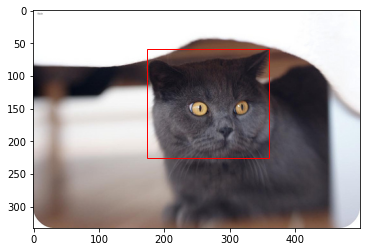

In [9]:
rnd_idx = random.randint(1, len(bbox_files))

bbox_name = bbox_files[rnd_idx]
bbox_path = os.path.join(bbox_dir, bbox_name)

fname = os.path.splitext(bbox_name)[0]+'.jpg'
fpath = os.path.join(image_dir, fname)
image = Image.open(fpath)
image = np.array(image)


# xml parsing
tree = et.parse(bbox_path)

width  = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax-xmin
rect_h = ymax-ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

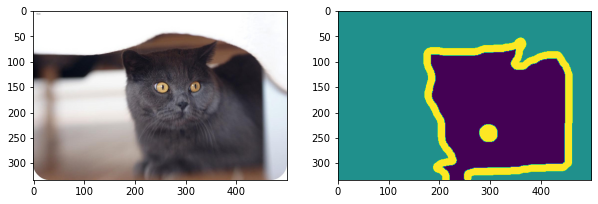

In [10]:
## segmentation label
## 1: foreground, 2: background, 3: not classified (boundary)

sname = os.path.splitext(fname)[0]+'.png'
spath = os.path.join(seg_dir, sname)
seg = Image.open(spath)
seg = np.array(seg)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg)
plt.show()

## class to index

In [11]:
import re

In [12]:
class_list = set()
for image_file in image_files:
    file_name = os.path.splitext(image_file)[0]
    class_name = re.sub('_\d+', '', file_name)   # name_number.jpg
    class_list.add(class_name)
    
class_list = list(class_list)
class_list.sort()
print(len(class_list))

37


In [13]:
# class2idx 생성
# uppercase = Cat / lowercase = Dog

class2idx = {cls:idx for idx, cls in enumerate(class_list)}
class2idx

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

## Transform image data to TFRecord 

In [14]:
import tensorflow as tf

In [15]:
# The following functions can be used to convert a value to a type compatible with tf.Example.

def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [16]:
IMG_SIZE = 224

In [17]:
## TFRecord 저장할 directory
tfr_dir = os.path.join(data_dir, 'tfrecord')
os.makedirs(tfr_dir, exist_ok=True)

### (1) classification을 위한 tfrecord 데이터 생성

In [18]:
N_DATA = len(image_files)
N_TRAIN = 6000

shuffle_list = list(range(N_DATA))
random.shuffle(shuffle_list)

train_idx_list = shuffle_list[:N_TRAIN]
val_idx_list = shuffle_list[N_TRAIN:]

In [19]:
# classification을 위한 파일 경로 설정
tfr_train = os.path.join(tfr_dir, 'cls_train.tfr')
tfr_val = os.path.join(tfr_dir, 'cls_val.tfr')

## TFRecord writer 생성
writer_train = tf.io.TFRecordWriter(tfr_train)
writer_val = tf.io.TFRecordWriter(tfr_val)

In [20]:
## Training data로 tfrecord 만들기
n_train = 0

for idx in train_idx_list:
    train_file = image_files[idx]
    train_path = os.path.join(image_dir, train_file)
    image = Image.open(train_path)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    bimage = image.tobytes()

    file_name = os.path.splitext(train_file)[0]   # Bangal_101
    class_name = re.sub('_\d+', '', file_name)
    class_num = class2idx[class_name]

    example = tf.train.Example(features=tf.train.Features(feature={
        'image': _bytes_feature(bimage),
        'cls_num': _int64_feature(class_num)
    }))
    writer_train.write(example.SerializeToString())
    n_train += 1

writer_train.close()


## Validation data로 tfrecord 만들기
n_val = 0

for idx in val_idx_list:
    val_file = image_files[idx]
    val_path = os.path.join(image_dir, val_file)
    image = Image.open(val_path)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    bimage = image.tobytes()

    file_name = os.path.splitext(val_file)[0] #Bangal_101
    class_name = re.sub('_\d+', '', file_name)
    class_num = class2idx[class_name]

    example = tf.train.Example(features=tf.train.Features(feature={
        'image': _bytes_feature(bimage),
        'cls_num': _int64_feature(class_num)
    }))
    writer_val.write(example.SerializeToString())
    n_val += 1

writer_val.close()


print(n_train)
print(n_val)

6000
1378


### (2) localization을 위한 tfrecord 데이터 생성

In [21]:
N_DATA = len(bbox_files)
N_TRAIN = 3000

shuffle_list = list(range(N_DATA))
random.shuffle(shuffle_list)

train_idx_list = shuffle_list[:N_TRAIN]
val_idx_list = shuffle_list[N_TRAIN:]

In [22]:
# classification을 위한 파일 경로 설정
tfr_train = os.path.join(tfr_dir, 'loc_train.tfr')
tfr_val = os.path.join(tfr_dir, 'loc_val.tfr')

## TFRecord writer 생성
writer_train = tf.io.TFRecordWriter(tfr_train)
writer_val = tf.io.TFRecordWriter(tfr_val)

In [23]:
n_train = 0
for idx in train_idx_list:
    bbox_file = bbox_files[idx]
    bbox_path = os.path.join(bbox_dir, bbox_file)

    tree = et.parse(bbox_path)
    width = float(tree.find('./size/width').text)
    height = float(tree.find('.size/height').text)
    xmin = float(tree.find('./object/bndbox/xmin').text)
    ymin = float(tree.find('./object/bndbox/ymin').text)
    xmax = float(tree.find('./object/bndbox/xmax').text)
    ymax = float(tree.find('./object/bndbox/ymax').text)
    xc = (xmin + xmax) / 2.
    yc = (ymin + ymax) / 2.
    x = xc / width
    y = yc / height
    w = (xmax - xmin) / width
    h = (ymax - ymin) / height

    file_name = os.path.splitext(bbox_file)[0]
    image_file = file_name + '.jpg'
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    bimage = image.tobytes()

    class_name = re.sub('_\d+', '', file_name)
    class_num = class2idx[class_name]

    if file_name[0].islower(): # dog
        bi_cls_num = 0
    else: # cat
        bi_cls_num = 1

    example = tf.train.Example(features=tf.train.Features(feature={
        'image': _bytes_feature(bimage),
        'cls_num': _int64_feature(class_num),
        'bi_cls_num': _int64_feature(bi_cls_num),
        'x': _float_feature(x),
        'y': _float_feature(y),
        'w': _float_feature(w),
        'h': _float_feature(h)
    }))
    writer_train.write(example.SerializeToString())
    n_train += 1

writer_train.close()


n_val = 0
for idx in val_idx_list:
    bbox_file = bbox_files[idx]
    bbox_path = os.path.join(bbox_dir, bbox_file)

    tree = et.parse(bbox_path)
    width = float(tree.find('./size/width').text)
    height = float(tree.find('.size/height').text)
    xmin = float(tree.find('./object/bndbox/xmin').text)
    ymin = float(tree.find('./object/bndbox/ymin').text)
    xmax = float(tree.find('./object/bndbox/xmax').text)
    ymax = float(tree.find('./object/bndbox/ymax').text)
    xc = (xmin + xmax) / 2.
    yc = (ymin + ymax) / 2.
    x = xc / width
    y = yc / height
    w = (xmax - xmin) / width
    h = (ymax - ymin) / height

    file_name = os.path.splitext(bbox_file)[0]
    image_file = file_name + '.jpg'
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    bimage = image.tobytes()

    class_name = re.sub('_\d+', '', file_name)
    class_num = class2idx[class_name]

    if file_name[0].islower(): # dog
        bi_cls_num = 0
    else: # cat
        bi_cls_num = 1

    example = tf.train.Example(features=tf.train.Features(feature={
        'image': _bytes_feature(bimage),
        'cls_num': _int64_feature(class_num),
        'bi_cls_num': _int64_feature(bi_cls_num),
        'x': _float_feature(x),
        'y': _float_feature(y),
        'w': _float_feature(w),
        'h': _float_feature(h)
    }))
    writer_val.write(example.SerializeToString())
    n_val += 1

writer_val.close()

print(n_train)
print(n_val)

3000
685


### (3) segmentation을 위한 tfrecord 데이터 생성

In [24]:
N_DATA = len(image_files)
N_TRAIN = 6000

shuffle_list = list(range(N_DATA))
random.shuffle(shuffle_list)

train_idx_list = shuffle_list[:N_TRAIN]
val_idx_list = shuffle_list[N_TRAIN:]

In [25]:
# classification을 위한 파일 경로 설정
tfr_train = os.path.join(tfr_dir, 'seg_train.tfr')
tfr_val = os.path.join(tfr_dir, 'seg_val.tfr')

## TFRecord writer 생성
writer_train = tf.io.TFRecordWriter(tfr_train)
writer_val = tf.io.TFRecordWriter(tfr_val)

In [26]:
## Training data로 tfrecord 만들기
n_train = 0

for idx in train_idx_list:
    train_file = image_files[idx]
    train_path = os.path.join(image_dir, train_file)
    image = Image.open(train_path)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    bimage = image.tobytes()

    file_name = os.path.splitext(train_file)[0]   # Bangal_101
    class_name = re.sub('_\d+', '', file_name)
    class_num = class2idx[class_name]

    if file_name[0].islower(): # dog
        bi_cls_num = 0
    else: # cat
        bi_cls_num = 1

    seg_name = file_name + '.png'
    seg_path = os.path.join(seg_dir, seg_name)
    seg = Image.open(seg_path)
    seg = seg.resize((IMG_SIZE, IMG_SIZE))
    seg = np.array(seg)
    seg[seg>2] = 1    # not classified (boundary) --> foreground. 1 & 3 --> 1
    seg[seg==2] = 0   # background. 2 --> 0
    bseg = seg.tobytes()

    example = tf.train.Example(features=tf.train.Features(feature={
        'image': _bytes_feature(bimage),
        'cls_num': _int64_feature(class_num),
        'bi_cls_num': _int64_feature(class_num),
        'seg': _bytes_feature(bseg)
    }))
    writer_train.write(example.SerializeToString())
    n_train += 1

writer_train.close()


## Validation data로 tfrecord 만들기
n_val = 0

for idx in val_idx_list:
    val_file = image_files[idx]
    val_path = os.path.join(image_dir, val_file)
    image = Image.open(val_path)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    bimage = image.tobytes()

    file_name = os.path.splitext(val_file)[0] #Bangal_101
    class_name = re.sub('_\d+', '', file_name)
    class_num = class2idx[class_name]

    if file_name[0].islower(): # dog
        bi_cls_num = 0
    else: # cat
        bi_cls_num = 1

    seg_name = file_name + '.png'
    seg_path = os.path.join(seg_dir, seg_name)
    seg = Image.open(seg_path)
    seg = seg.resize((IMG_SIZE, IMG_SIZE))
    seg = np.array(seg)
    seg[seg>2] = 1    # not classified (boundary) --> foreground. 1 & 3 --> 1
    seg[seg==2] = 0   # background. 2 --> 0
    bseg = seg.tobytes()

    example = tf.train.Example(features=tf.train.Features(feature={
        'image': _bytes_feature(bimage),
        'cls_num': _int64_feature(class_num),
        'bi_cls_num': _int64_feature(class_num),
        'seg': _bytes_feature(bseg)
    }))
    writer_val.write(example.SerializeToString())
    n_val += 1

writer_val.close()


print(n_train)
print(n_val)

6000
1378
